In [1]:
!pip install matplotlib numpy scipy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#question 1
np.random.seed(0)  
traffic_data = np.random.poisson(lam=50, size=1440)  
noise = np.random.normal(0, 5, size=1440) 
traffic_data_noisy = traffic_data + noise

In [5]:
traffic_data_noisy

array([47.31407415, 48.60835081, 47.58355802, ..., 48.54829234,
       78.04885954, 46.67599984])

In [4]:
#question 2
from scipy.signal import butter, filtfilt

def low_pass_filter(data, cutoff=0.1, fs=1.0, order=2):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

traffic_data_smooth = low_pass_filter(traffic_data_noisy)


In [6]:
traffic_data_smooth

array([47.31810613, 50.52585799, 53.50865688, ..., 52.45117495,
       50.22251232, 46.61557166])

In [16]:
#question 3
def calculate_hourly_avg(data):
    hourly_avg = np.mean(data.reshape(-1, 60), axis=1)
    return hourly_avg

hourly_avg = calculate_hourly_avg(traffic_data_smooth)

In [17]:
hourly_avg

array([50.54656132, 50.36835417, 49.04520276, 49.35516945, 48.63107194,
       50.56862979, 49.54509596, 49.61707708, 51.25242234, 48.79709836,
       49.46763451, 49.13696296, 52.34592228, 50.87383983, 51.62941974,
       49.8889335 , 49.56620825, 49.97351994, 50.58426573, 49.71375108,
       49.16158558, 49.90574145, 49.65291663, 51.07463239])

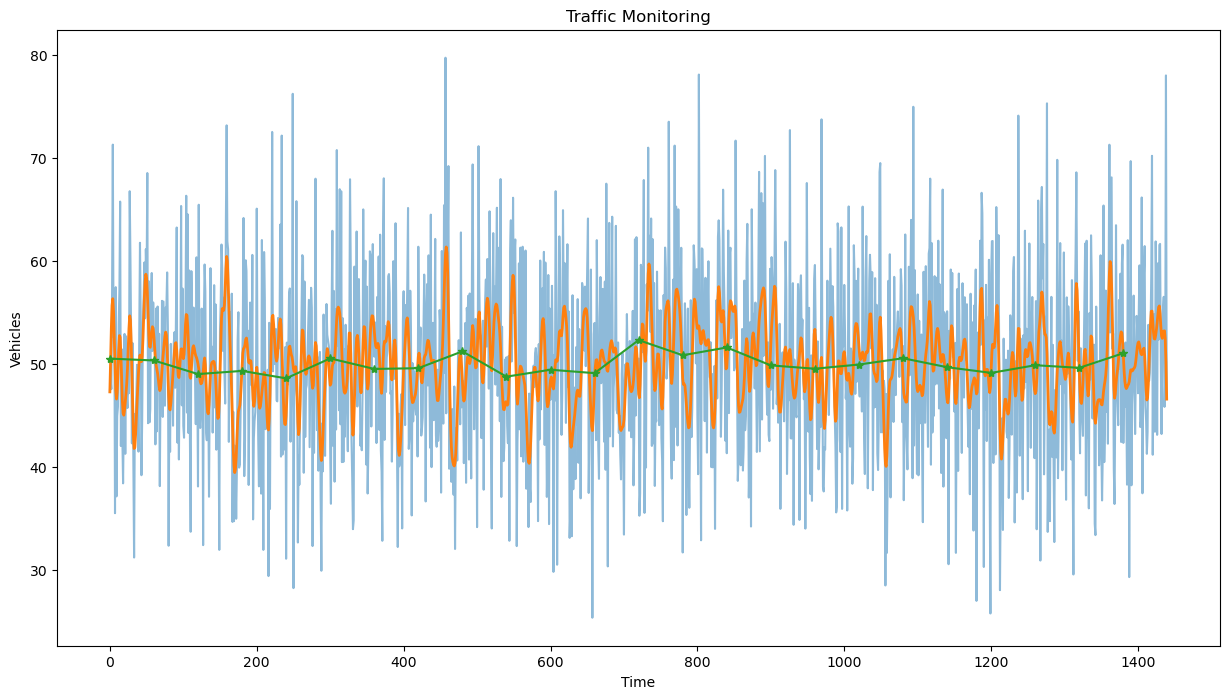

In [32]:
#question 4
plt.figure(figsize=(15, 8))
plt.plot(traffic_data_noisy, label='Noisy Data', alpha=0.5)
plt.plot(traffic_data_smooth, label='Smoothed Data', linewidth=2)
plt.plot(np.arange(0, 1440, 60), hourly_avg, '*-', label='Hourly Avg')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.title("Traffic Monitoring")
plt.show()

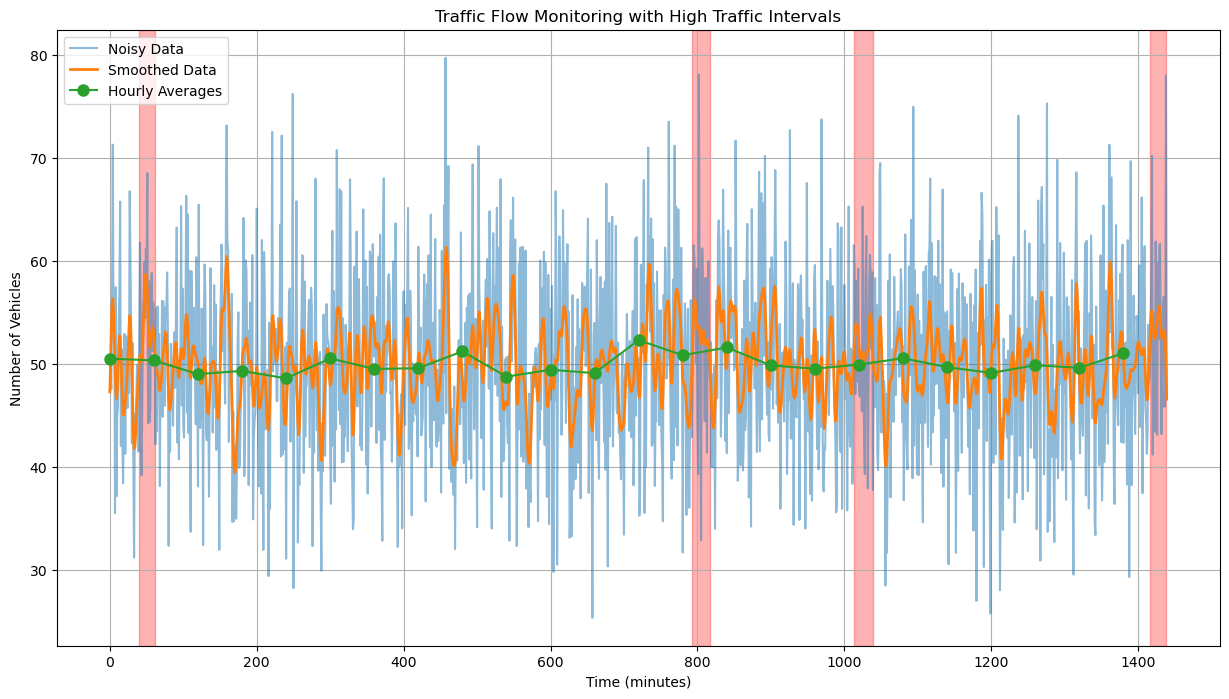

In [44]:
#question 5

def identify(data, threshold=50, duration=20):
    high_traffic = np.where(data > threshold)[0]
    intervals = []
    start = high_traffic[0]
    for i in range(1, len(high_traffic)):
        if high_traffic[i] != high_traffic[i-1] + 1:
            if high_traffic[i-1] - start + 1 >= duration:
                intervals.append((start, high_traffic[i-1]))
            start = high_traffic[i]
    if high_traffic[-1] - start + 1 >= duration:
        intervals.append((start, high_traffic[-1]))
    return intervals
    

high_traffic_intervals= identify(traffic_data_smooth)


plt.figure(figsize=(15, 8))
plt.plot(traffic_data_noisy, label='Noisy Data', alpha=0.5)
plt.plot(traffic_data_smooth, label='Smoothed Data', linewidth=2)
plt.plot(np.arange(0, 1440, 60), hourly_avg, 'o-', label='Hourly Averages', markersize=8)

for start, end in high_traffic:
    plt.axvspan(start, end, color='red', alpha=0.3)

plt.xlabel('Time (minutes)')
plt.ylabel('Number of Vehicles')
plt.title('Traffic Flow Monitoring with High Traffic Intervals')
plt.legend()
plt.grid(True)
plt.show()
